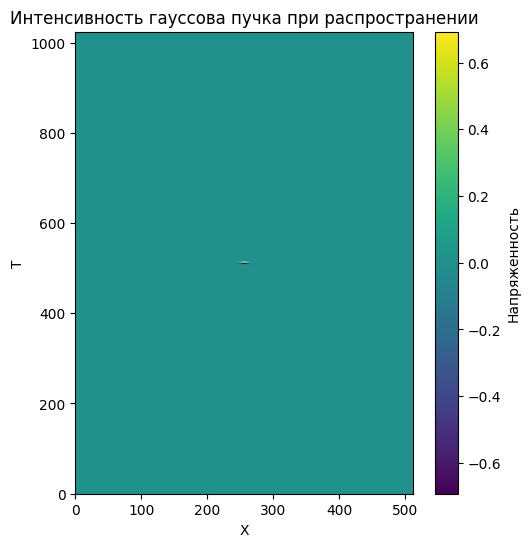

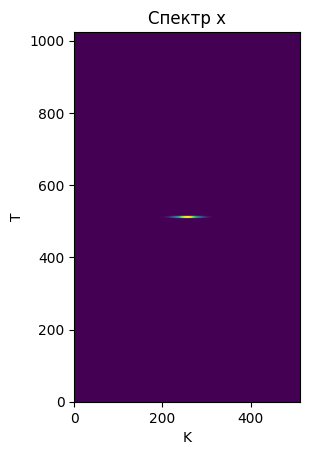

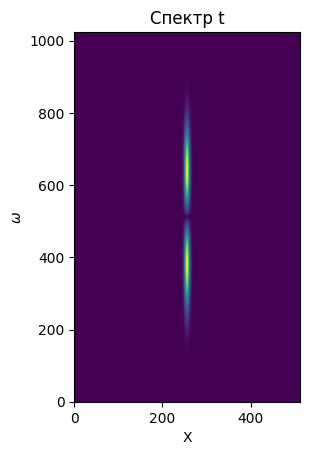

In [213]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.fft import ifft2, fft, fftfreq, fftshift, fft2


#### Параметры пучка ####
WAVELEN = 700e-6
E0 = 1
C = 3e+8
TAU = 5 * WAVELEN / C / 10
XTAU = 0.005
X_WIN = 0.3
T_WIN = 3e-10
OMEGA0 = 2 * np.pi * C / WAVELEN

DOTS = 2 ** 10
## Фокус ##
F = 0.254

####### ВРЕМЯ ПРОСТРАНСТВО #########
TIME = np.linspace(-T_WIN/2, T_WIN/2, DOTS)
X_SPACE = np.linspace(-X_WIN/2, X_WIN/2, DOTS//2)
X, T = np.meshgrid(X_SPACE, TIME, indexing = "xy")
####################################

########## Импульс(X, T) ###########
E_X = E0 * np.exp(-2 * (X / XTAU) ** 2) * np.exp(-2 * (T / TAU) ** 2) * np.sin(OMEGA0 * T)


#######################################
#### Спектры времени/ пространства ####
#######################################
E_SPEC_X = fftshift(fft(E_X, axis= 1), axes = 1)
E_SPEC_T = fftshift(fft(E_X, axis= 0), axes = 0)
E_x_spec_xt = fft(E_X)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pcolormesh(E_X, shading='auto', cmap='viridis')

plt.colorbar(label='Напряженность')

plt.title('Интенсивность гауссова пучка при распространении')
plt.xlabel('X')
plt.ylabel('T')
plt.pcolormesh(E_X)
plt.show()
plt.subplot(1, 2, 1)
plt.title('Спектр x')
plt.xlabel('K')
plt.ylabel('T')
plt.pcolormesh(abs(E_SPEC_X))
plt.show()
plt.subplot(1, 2, 1)
plt.title('Спектр t')
plt.xlabel('X')
plt.ylabel('$\omega$')
plt.pcolormesh(abs(E_SPEC_T))
plt.show()

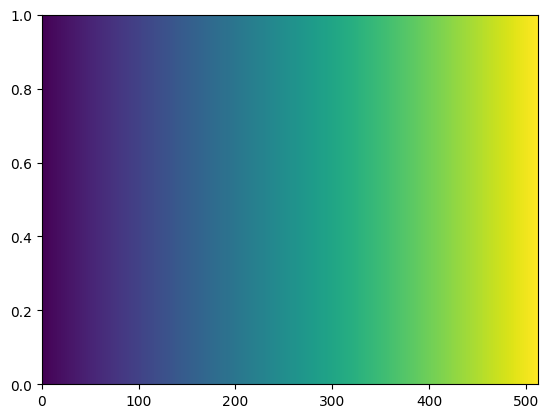

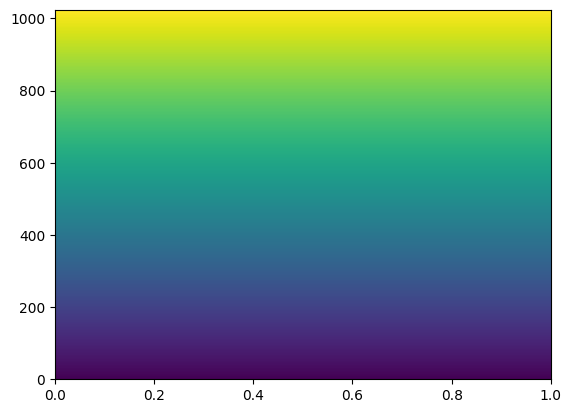

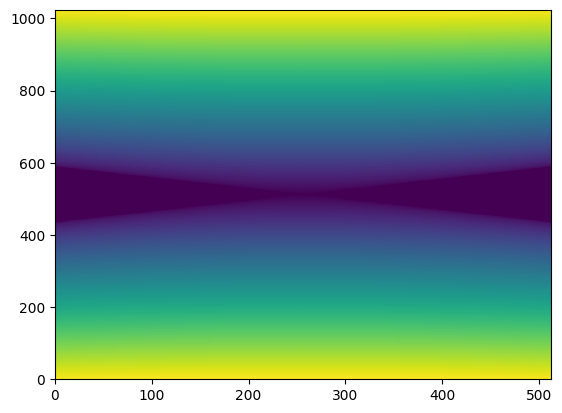

In [199]:
def k():
    kx = fftshift(fftfreq(DOTS//2, (X_SPACE[2]-X_SPACE[1]))) * 2*np.pi
    k_ = fftshift(fftfreq(DOTS, TIME[2]-TIME[1])) / C * 2 * np.pi
    kx, k_ = np.asarray([kx]), np.asarray([k_])
    
    k_sqr = k_.T ** 2 - kx ** 2
    kz = np.sqrt(np.where(k_sqr < 0, 0, k_sqr))
    

    return kx, kz, k_
kx, kz, k_ = k()
plt.pcolormesh(kx)
plt.show()
plt.pcolormesh(k_.T)
plt.show()
plt.pcolormesh(kz)
plt.show()

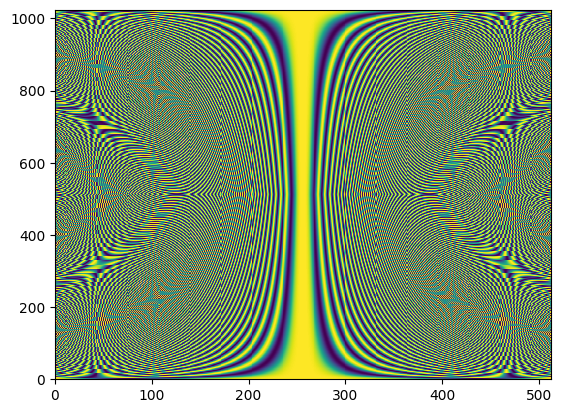

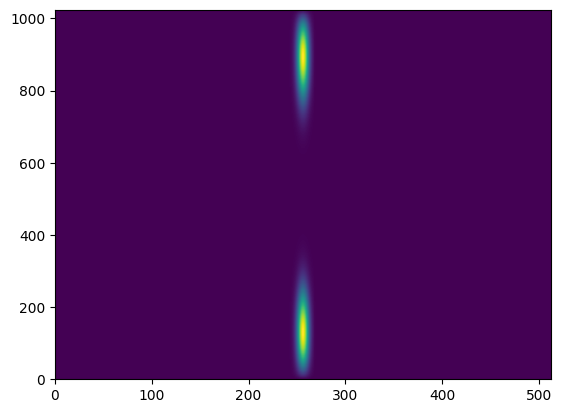

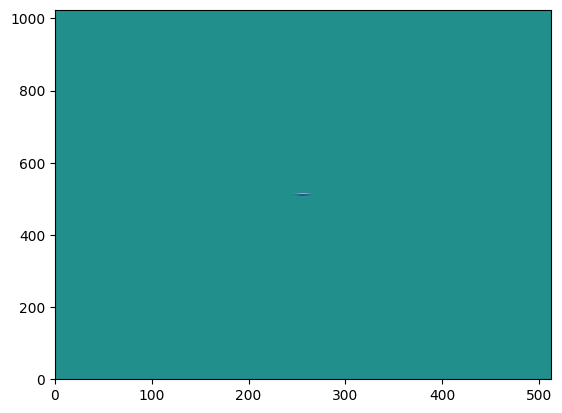

In [208]:
def linza(x, k_):
    return np.exp(-(1j * k_ / (2 * F)) * x ** 2)

E_X_LENS_F = fftshift(linza(X_SPACE, k_.T), axes = 0) *fftshift(E_SPEC_T, axes = 0) 
E_X_LENS = np.fft.ifft(E_X_LENS_F, axis = 0)

plt.pcolormesh(fftshift(linza(X_SPACE, k_.T), axes = 0).real)
plt.show()
plt.pcolormesh(abs(fftshift(E_SPEC_T, axes = 0) ))
plt.show()
plt.pcolormesh(E_X_LENS.real)
plt.show()
# plt.pcolormesh(linza(X_SPACE, k_.T).real)
# plt.show

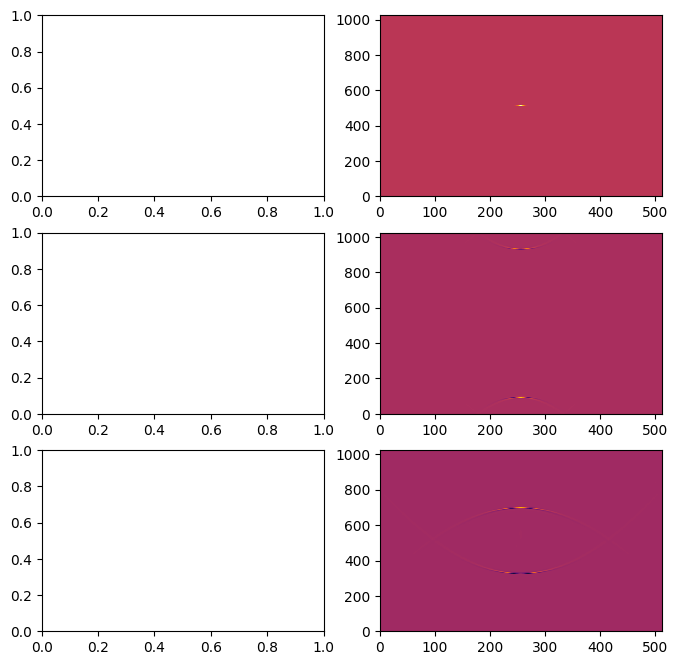

In [227]:
def C_():
    return fft2(E_X_LENS)
 
def g_x(z):
    g = C_()
    for i in range(10):
        g *= fftshift(np.exp(-1j * kz * z/10))
        g[g.shape[0] // 2:] = (g[:g.shape[0] // 2])[::-1]
        
    return ifft2(g).real

# def g_z(z):
#     kx, kz, k_ = k()
#     g = (kx * C_() * np.exp(-1j * kz * z)/kz)
#     return np.fft.ifft2(g).real


fig, axes = plt.subplots(3, 2, figsize=(8,8))
ax = axes[0,1]
ax.pcolormesh(g_x(0), cmap='inferno')
ax = axes[1,1]
ax.pcolormesh(g_x(F/2), cmap='inferno')
ax = axes[2,1]
ax.pcolormesh(g_x(F), cmap='inferno')
plt.show()

In [8]:
import numpy as np 
a = np.asarray([[1,1], [2,2], [3,3]])
b = np.asarray([1,2])
b*a

array([[1, 2],
       [2, 4],
       [3, 6]])